# Exploring Dandiset 001176: Cortical Acetylcholine Dynamics

**Note: This notebook was AI-generated with human supervision and has not been fully verified. Please be cautious when interpreting the code or results.**

This notebook demonstrates how to load and visualize data from [DANDI:001176](https://neurosift.app/dandiset/001176), which contains simultaneous in vivo imaging of:
* Acetylcholine (ACh) sensors (GACh3.0)
* GCaMP-expressing axons in the cortex
* Behavioral measurements (pupil size, movement)

## Setup

First, import the necessary libraries:

In [1]:
import pynwb
import lindi
import numpy as np
import matplotlib.pyplot as plt

## Loading Data from DANDI Archive

Let's look at how to load a recording from M1. Each recording session is stored as an NWB file with a unique asset ID.

In [2]:
# Load an example M1 recording
asset_id = "4550467f-b94d-406b-8e30-24dd6d4941c1"
url = f"https://lindi.neurosift.org/dandi/dandisets/001176/assets/{asset_id}/nwb.lindi.json"
f = lindi.LindiH5pyFile.from_lindi_file(url)
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

# Print basic session information
print("Session Information:")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Age: {nwb.subject.age}")
print(f"Description: {nwb.experiment_description}")
print(f"Lab: {nwb.lab}")

Session Information:
Subject ID: 16
Age: P406D
Description: scans recording a green ACh sensor (GACh3.0) in Primary motor cortex
Lab: Reimer, Jacob


## Available Data Streams

Each recording contains several data streams. Let's examine what's available:

In [3]:
print("\nAcquisition Data:")
for name in nwb.acquisition.keys():
    print(f"- {name}")

print("\nProcessing Modules:")
for name in nwb.processing.keys():
    print(f"- {name}")
    
print("\nOphys Module Contents:")
ophys = nwb.processing["ophys"]
for name in ophys.data_interfaces.keys():
    print(f"- {name}")


Acquisition Data:
- EyeTracking
- PupilTracking
- imageMeanIntensity
- treadmill_velocity

Processing Modules:
- ophys

Ophys Module Contents:
- Fluorescence
- ImageSegmentation
- SummaryImages_chan1


## Loading and Plotting ACh Fluorescence Data

The ACh fluorescence data is stored in the ophys processing module:

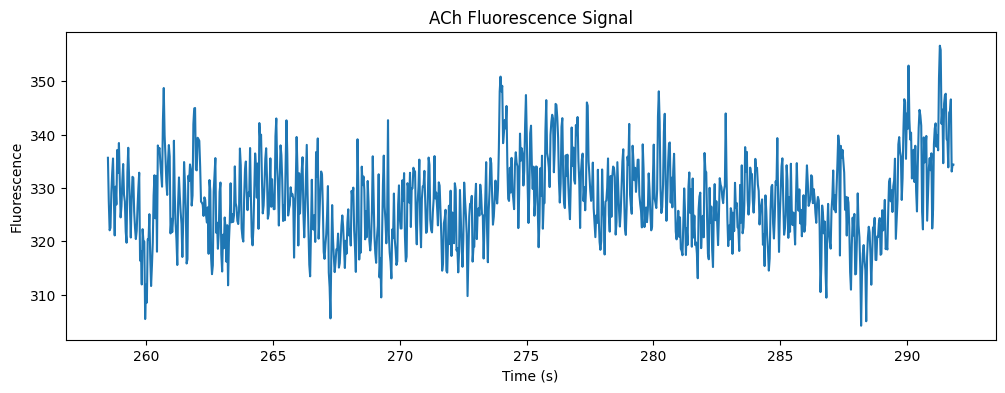

In [4]:
# Get fluorescence data
fluorescence = nwb.processing["ophys"]["Fluorescence"]["RoiResponseSeries1"].data[:]
fluor_times = nwb.processing["ophys"]["Fluorescence"]["RoiResponseSeries1"].timestamps[:]

# Plot a segment of the fluorescence trace
plt.figure(figsize=(12, 4))
window = 1000  # Plot first 1000 timepoints
plt.plot(fluor_times[:window], fluorescence[:window])
plt.title("ACh Fluorescence Signal")
plt.xlabel("Time (s)")
plt.ylabel("Fluorescence")
plt.show()

## Loading Behavioral Data

The dataset includes behavioral measurements like pupil tracking and movement:

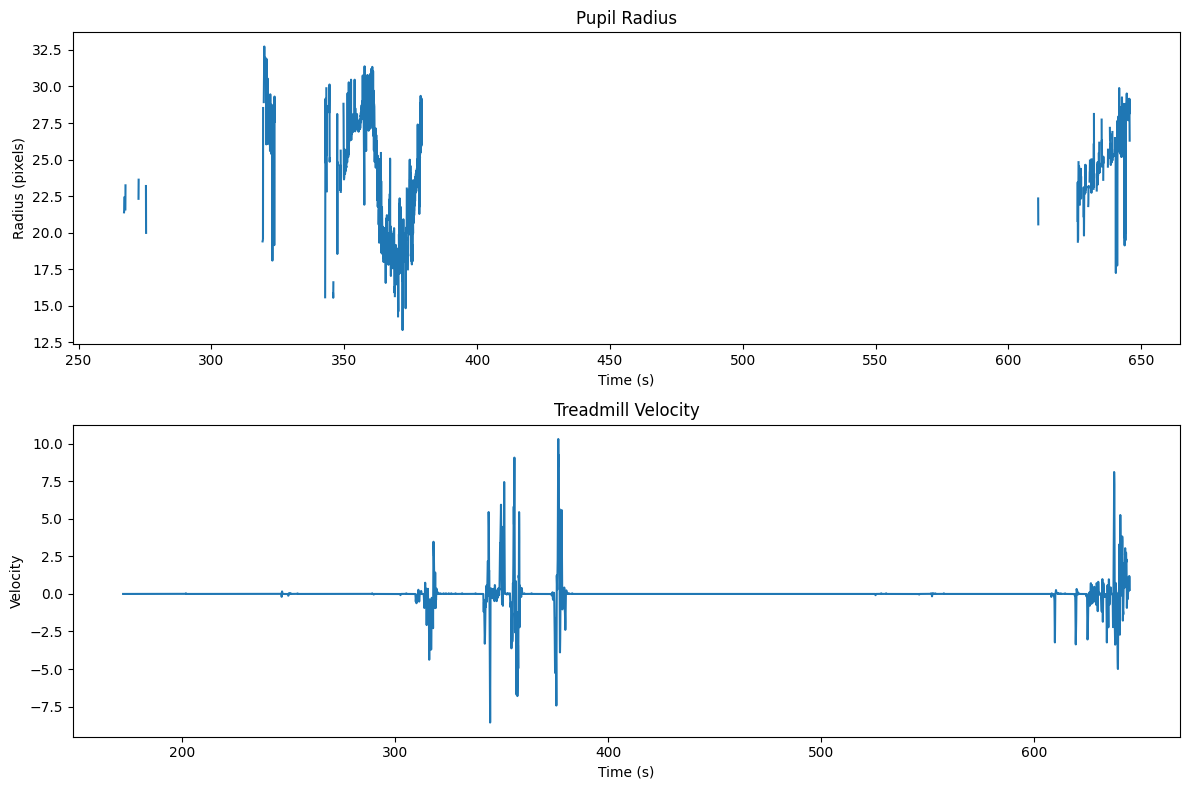

In [5]:
# Get behavioral data
pupil = nwb.acquisition["PupilTracking"]["pupil_raw_radius"].data[:]
pupil_times = nwb.acquisition["PupilTracking"]["pupil_raw_radius"].timestamps[:]

velocity = nwb.acquisition["treadmill_velocity"].data[:]
velocity_times = nwb.acquisition["treadmill_velocity"].timestamps[:]

# Plot behavioral measurements
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Pupil size
window = len(pupil_times) // 4  # Plot first quarter of the data
ax1.plot(pupil_times[:window], pupil[:window])
ax1.set_title("Pupil Radius")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Radius (pixels)")

# Treadmill velocity 
window = len(velocity_times) // 4
ax2.plot(velocity_times[:window], velocity[:window])
ax2.set_title("Treadmill Velocity")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Velocity")

plt.tight_layout()
plt.show()

## Examining Image Data

The dataset also includes summary images that can help visualize the recording location:

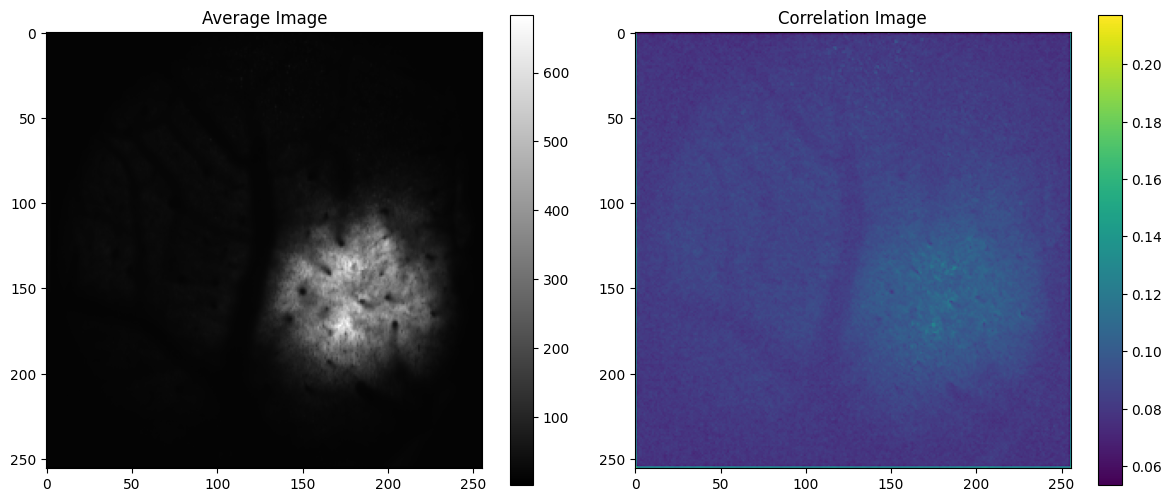

In [6]:
# Get summary images
summary_images = nwb.processing["ophys"]["SummaryImages_chan1"]

# Plot average and correlation images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Average image
avg_img = summary_images["average"].data[:]
im1 = ax1.imshow(avg_img, cmap='gray')
ax1.set_title("Average Image")
plt.colorbar(im1, ax=ax1)

# Correlation image
corr_img = summary_images["correlation"].data[:]
im2 = ax2.imshow(corr_img, cmap='viridis')
ax2.set_title("Correlation Image")
plt.colorbar(im2, ax=ax2)

plt.tight_layout()
plt.show()

## Loading Data from Different Brain Regions

The dataset includes recordings from both M1 and V1. Here's how to load a V1 recording:

V1 Recording Information:
Subject ID: 22713
Age: P1085D
Description: scans recording a green ACh sensor (GACh3.0) in Primary visual cortex


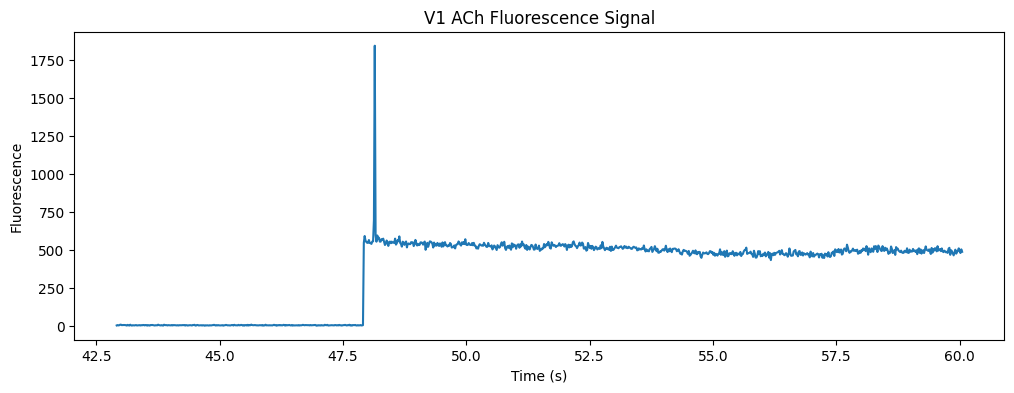

In [7]:
# Load an example V1 recording
v1_asset_id = "be84b6ff-7016-4ed8-af63-aa0e07c02530"
v1_url = f"https://lindi.neurosift.org/dandi/dandisets/001176/assets/{v1_asset_id}/nwb.lindi.json"
v1_f = lindi.LindiH5pyFile.from_lindi_file(v1_url)
v1_nwb = pynwb.NWBHDF5IO(file=v1_f, mode='r').read()

# Print basic info
print("V1 Recording Information:")
print(f"Subject ID: {v1_nwb.subject.subject_id}")
print(f"Age: {v1_nwb.subject.age}")
print(f"Description: {v1_nwb.experiment_description}")

# Get and plot V1 fluorescence data
v1_fluorescence = v1_nwb.processing["ophys"]["Fluorescence"]["RoiResponseSeries1"].data[:]
v1_times = v1_nwb.processing["ophys"]["Fluorescence"]["RoiResponseSeries1"].timestamps[:]

plt.figure(figsize=(12, 4))
window = 1000  # Plot first 1000 timepoints
plt.plot(v1_times[:window], v1_fluorescence[:window])
plt.title("V1 ACh Fluorescence Signal")
plt.xlabel("Time (s)")
plt.ylabel("Fluorescence")
plt.show()

## Loading Your Own Data

To analyze different sessions from this dataset:

1. Find the asset ID from the [DANDI archive](https://neurosift.app/dandiset/001176)
2. Use the code pattern below:
```python
asset_id = "your-asset-id-here"
url = f"https://lindi.neurosift.org/dandi/dandisets/001176/assets/{asset_id}/nwb.lindi.json"
f = lindi.LindiH5pyFile.from_lindi_file(url)
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()
```

Key data streams you can access:
* ACh fluorescence: `nwb.processing["ophys"]["Fluorescence"]["RoiResponseSeries1"]`
* Pupil tracking: `nwb.acquisition["PupilTracking"]["pupil_raw_radius"]`
* Movement: `nwb.acquisition["treadmill_velocity"]`
* Summary images: `nwb.processing["ophys"]["SummaryImages_chan1"]`